# Analsysis (Model selection):
* After reviwing the dataset, and it's expected outcome, we come to the conclusion that we need a supervised learning algorithm that's used to predict a categorical target variable, such as a binary output (yes/no, true/false, approved/not approved) based on multiple input variables like credit score, income, debt-to-income ratio, and employment status, several data models are considered. So, we decide to try multiple models and pick the most suitable model depends on a balance between interpretability, accuracy, and computational efficiency.

In [1]:
# uploading the loan approval application process dataset.....................
import pandas as pd
loan_approval_data = pd.read_csv('loan_approval_dataset.csv')
loan_approval_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [2]:
# checking the tailend of the dataset...........
loan_approval_data.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


# Data Transformation (Steps):
* As we know, the data transformation is crucial for building effective data models.
* We want to ensures that the data is clean, consistent, and in a suitable format for analysis.
* By handling missing values, improving data quality, engineering features, and normalizing scales, data transformation lays the groundwork for accurate, reliable, and interpretable models.
* Without proper data transformation, even the most sophisticated algorithms can fail to deliver meaningful insights and predictions.

In [3]:
# checking the dimensions of the dataset.................
loan_approval_data.shape

(4269, 13)

In [4]:
loan_approval_data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [5]:
# checking the data type of the variables of dataset "loan_approval_data"..............
loan_approval_data.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [6]:
# checking if there is any null value exists in the dataset..................
loan_approval_data.isna().sum().sort_values(ascending=False)

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
# Standardize column names in training data
loan_approval_data.columns = loan_approval_data.columns.str.strip()

In [8]:
# displaying the summary to have a better understanding about the dimenstion of the dataset............
loan_approval_data.describe().round(1)

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0
mean,2135.0,2.5,5059123.9,15133450.5,10.9,599.9,7472616.5,4973155.3,15126305.9,4976692.4
std,1232.5,1.7,2806839.8,9043363.0,5.7,172.4,6503636.6,4388966.1,9103753.7,3250185.3
min,1.0,0.0,200000.0,300000.0,2.0,300.0,-100000.0,0.0,300000.0,0.0
25%,1068.0,1.0,2700000.0,7700000.0,6.0,453.0,2200000.0,1300000.0,7500000.0,2300000.0
50%,2135.0,3.0,5100000.0,14500000.0,10.0,600.0,5600000.0,3700000.0,14600000.0,4600000.0
75%,3202.0,4.0,7500000.0,21500000.0,16.0,748.0,11300000.0,7600000.0,21700000.0,7100000.0
max,4269.0,5.0,9900000.0,39500000.0,20.0,900.0,29100000.0,19400000.0,39200000.0,14700000.0


# Output Analysis:
* The statistical summary of these variables provides insights into the distribution and central tendencies of the data, which can be crucial for understanding the characteristics of the loan applicants and for building predictive models for loan approval.
* Number of Dependents: The average number of dependents per applicant is approximately 2.5, with a standard deviation of 1.70, indicating moderate variability. The data ranges from 0 to 5 dependents, covering a broad spectrum of family sizes.
* Annual Income: The mean annual income stands at 5,059,124, but the high standard deviation of 2,806,840 suggests significant income disparity among applicants. The income ranges from 200,000 to 9,900,000, highlighting the diversity in financial backgrounds.
* Loan Amount: On average, applicants request loans of 15,133,450, with a substantial standard deviation of 9,043,363. The loan amounts vary widely from 300,000 to 39,500,000, reflecting the different financial needs and borrowing capacities.
* Loan Term: The average loan term is around 10.9 years, with terms ranging from 2 to 20 years. This indicates a mix of short-term and long-term borrowing preferences.
* CIBIL Score: The mean CIBIL score is 599.9, with a standard deviation of 172.4. Scores range from 300 to 900, suggesting a wide range of creditworthiness among applicants.
* Asset Values: The values for residential, commercial, luxury, and bank assets show considerable variability. The mean values for residential assets, commercial assets, luxury assets, and bank assets are 7,472,617, 4,973,155, 15,126,310, and 4,976,692, respectively. Notably, the residential assets value includes a negative minimum, which might indicate data entry errors or liabilities.

In [9]:
# selecting the variables with numerical data type from the dataset "loan_approval_data"...............
num_var_loan = loan_approval_data.select_dtypes(include=['int64','float64'])
cat_var_load = loan_approval_data.select_dtypes(include=['object'])

In [10]:
# counting the number of unique values for each of the categorical column..................
unique_cat_count = cat_var_load.nunique()
unique_cat_count

education        2
self_employed    2
loan_status      2
dtype: int64

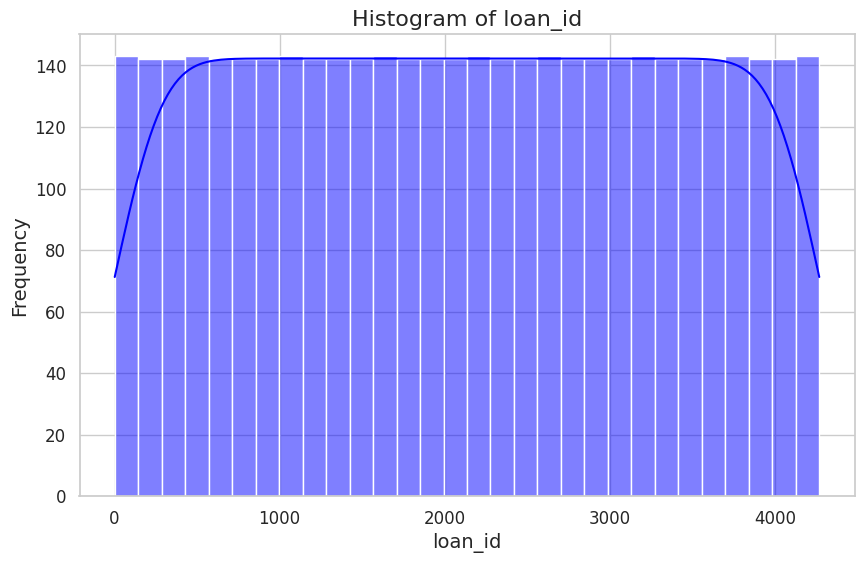

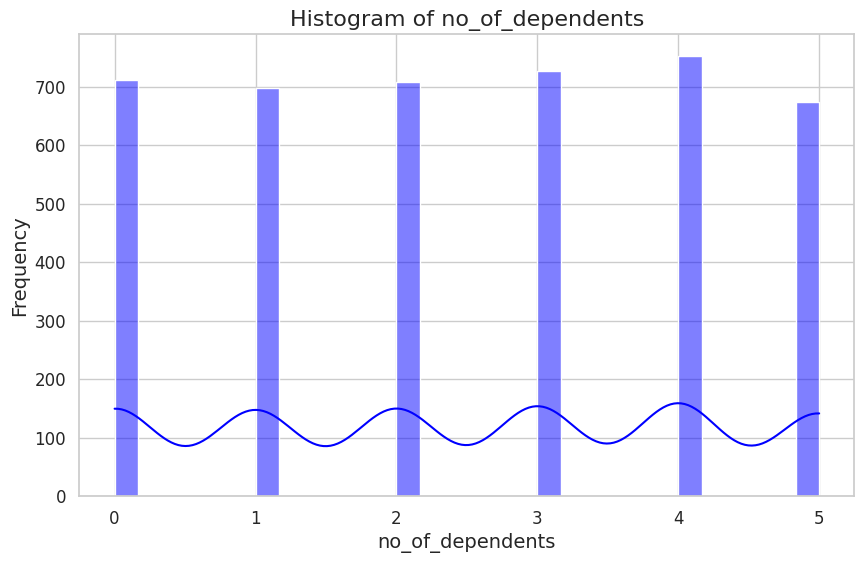

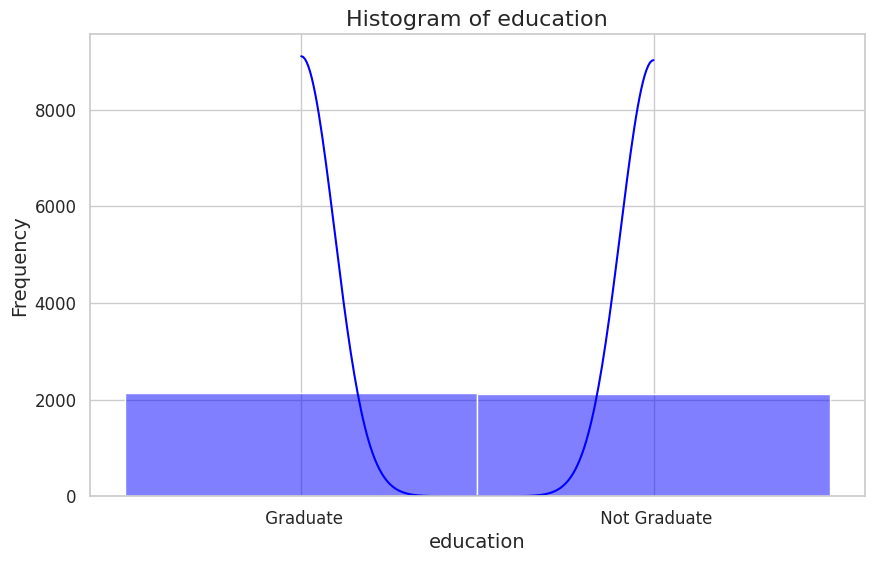

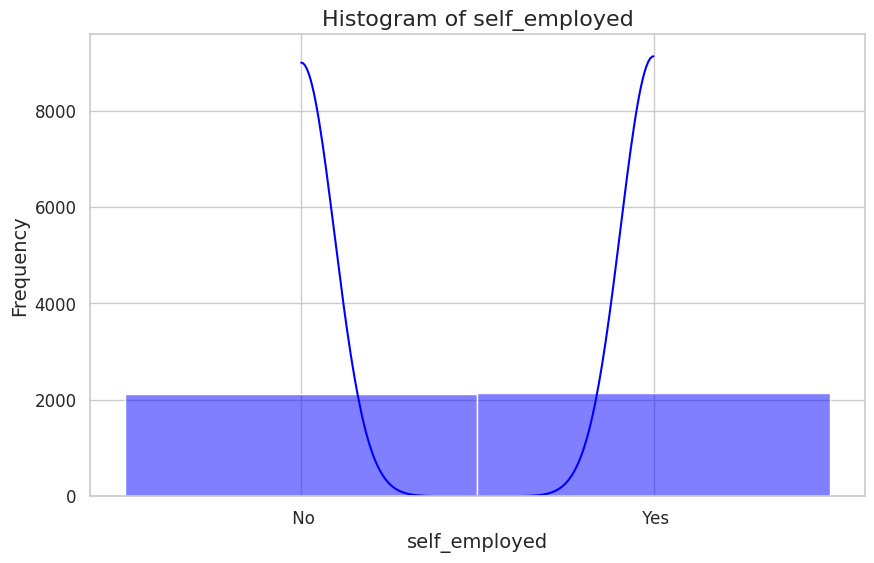

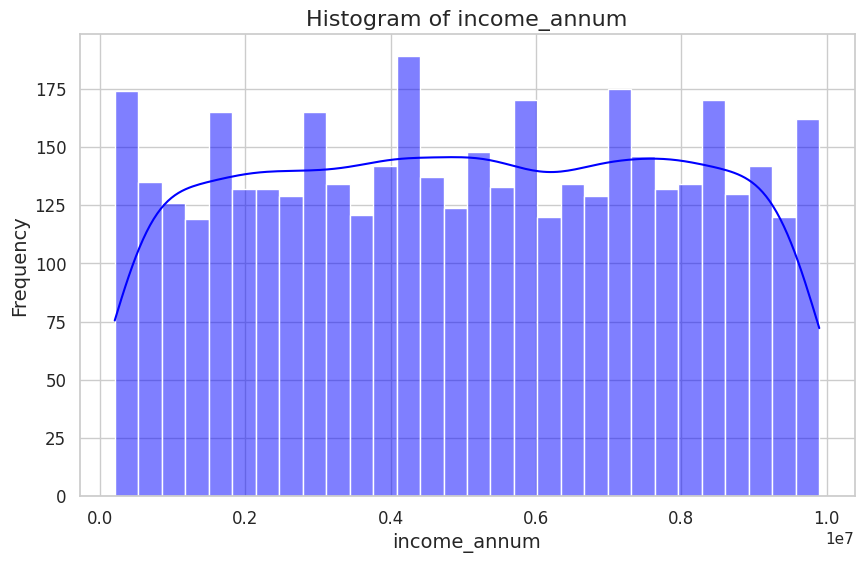

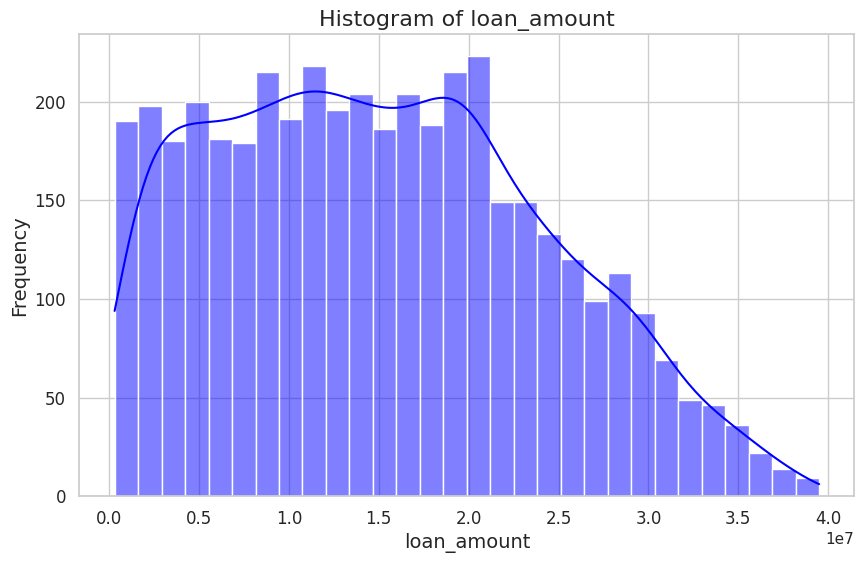

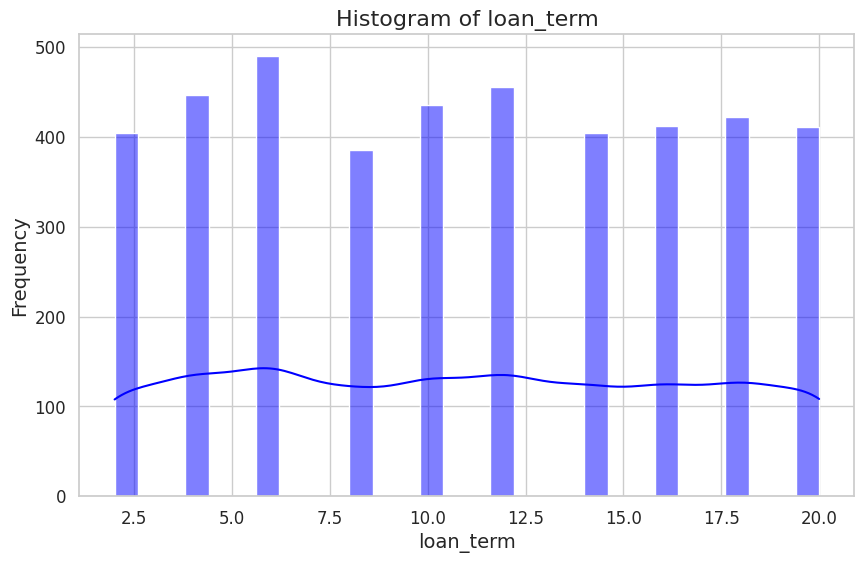

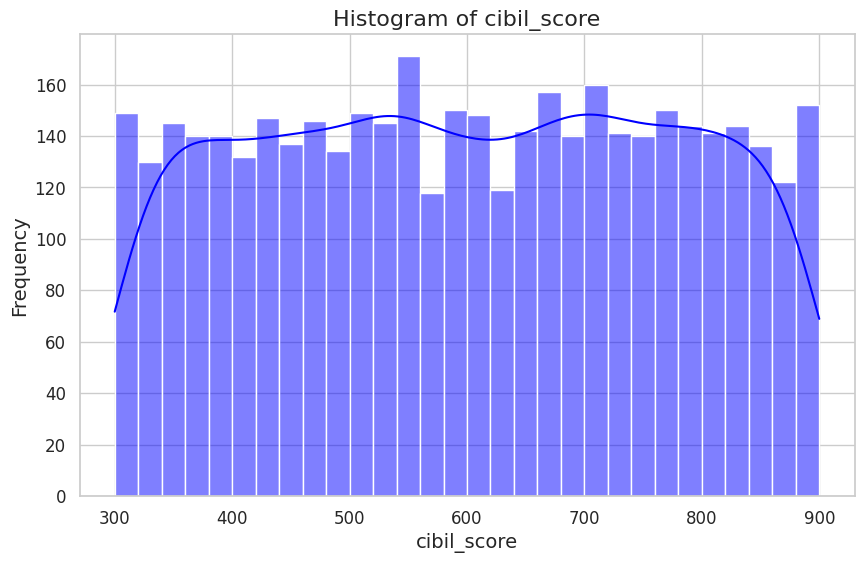

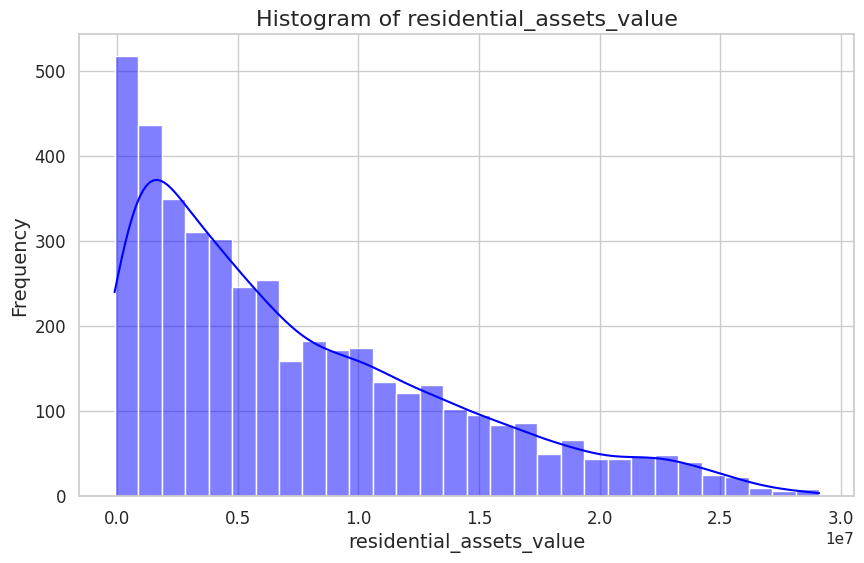

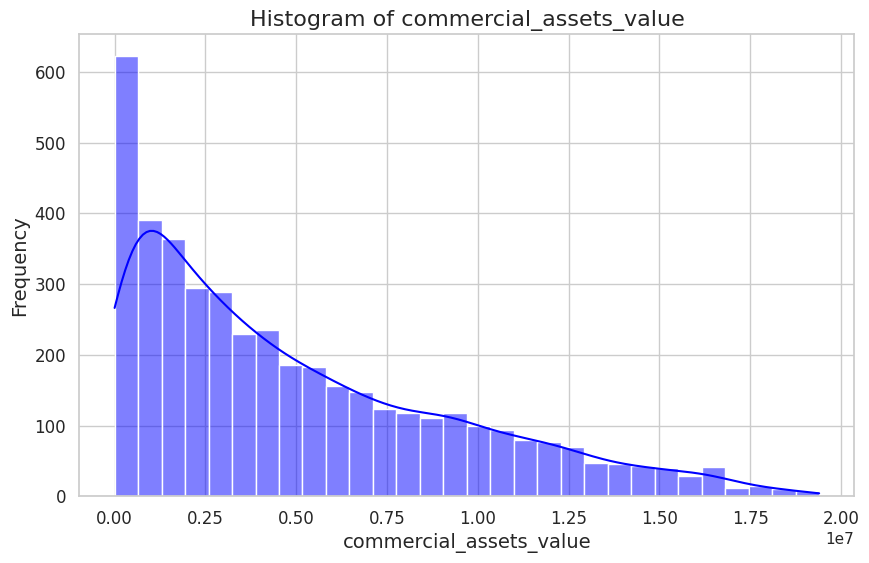

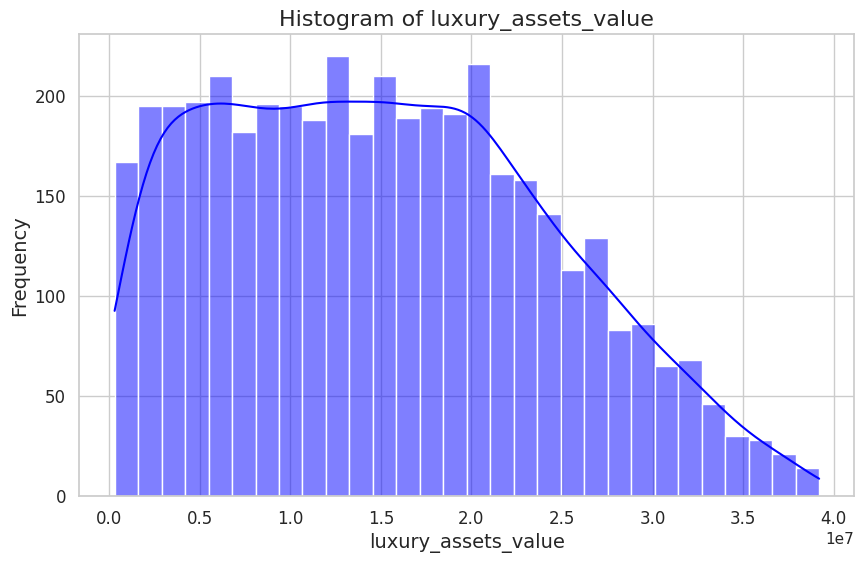

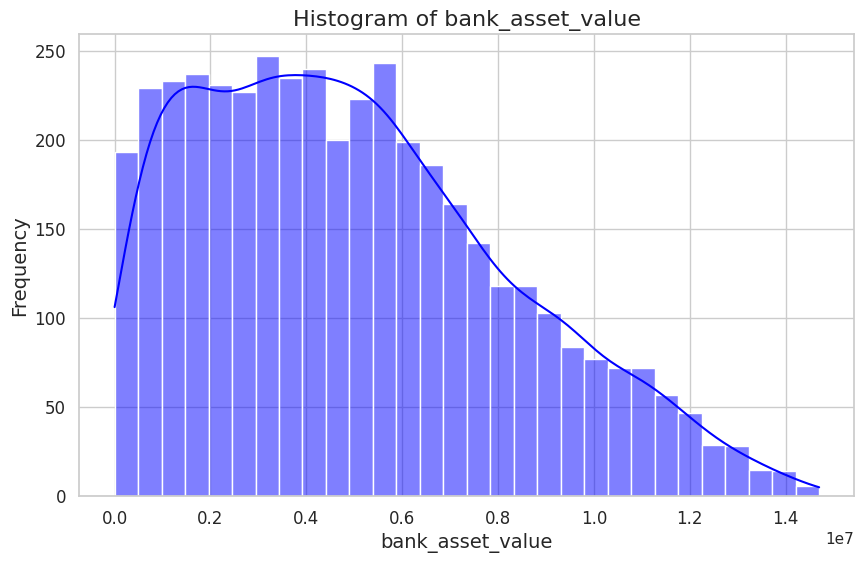

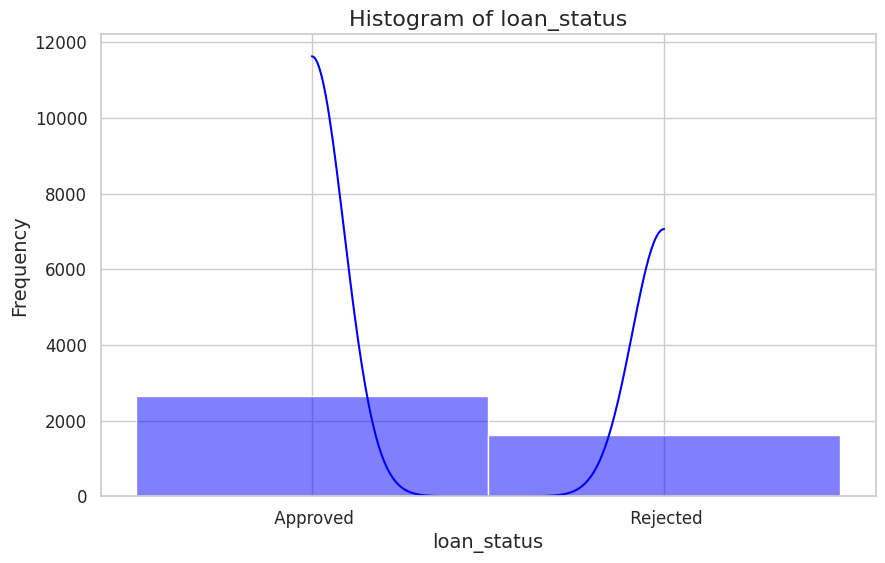

In [11]:
# creating a histogram chart...........................
# setting the aesthetic style of the plots :)..............................
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid")

# creating the histograms for each numerical column........................
for column in loan_approval_data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=loan_approval_data, x=column, kde=True, bins=30, color='blue')   
    # adding the titles and labels................
    plt.title(f'Histogram of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.show()


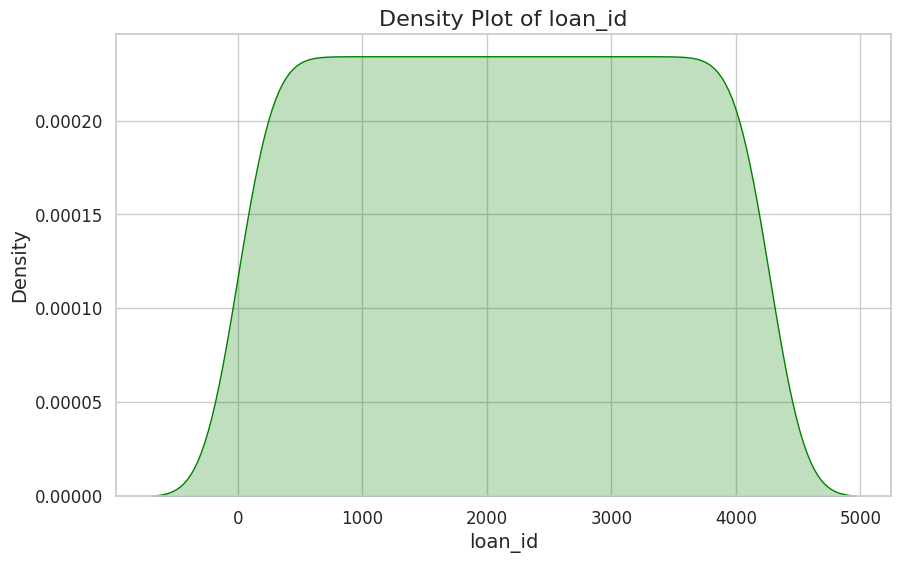

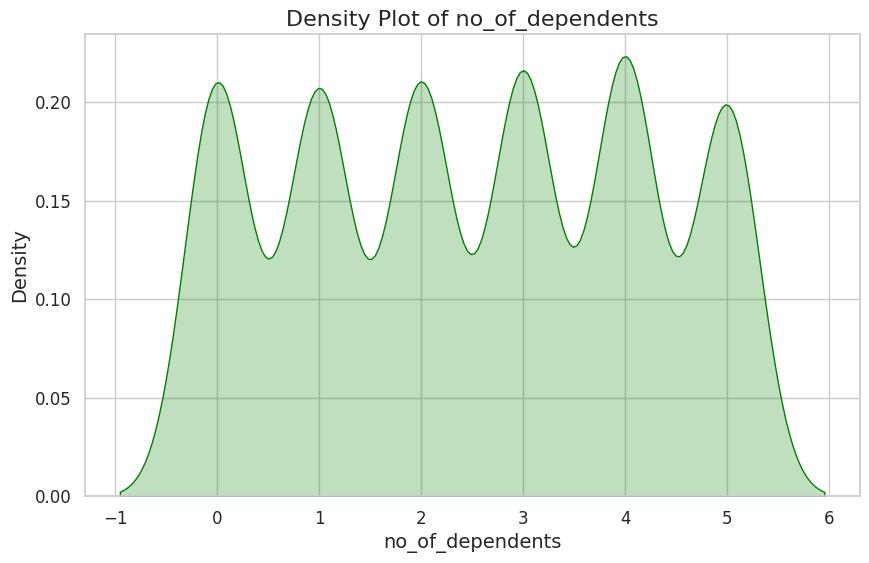

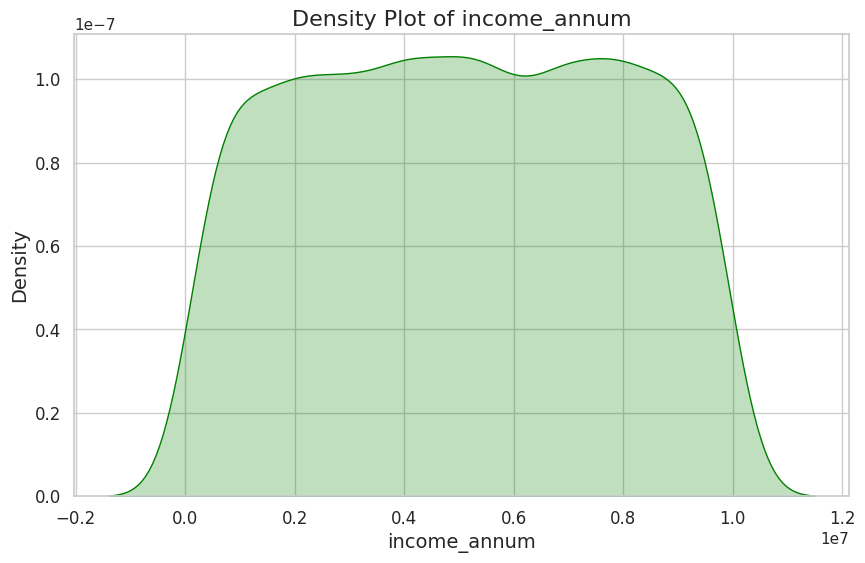

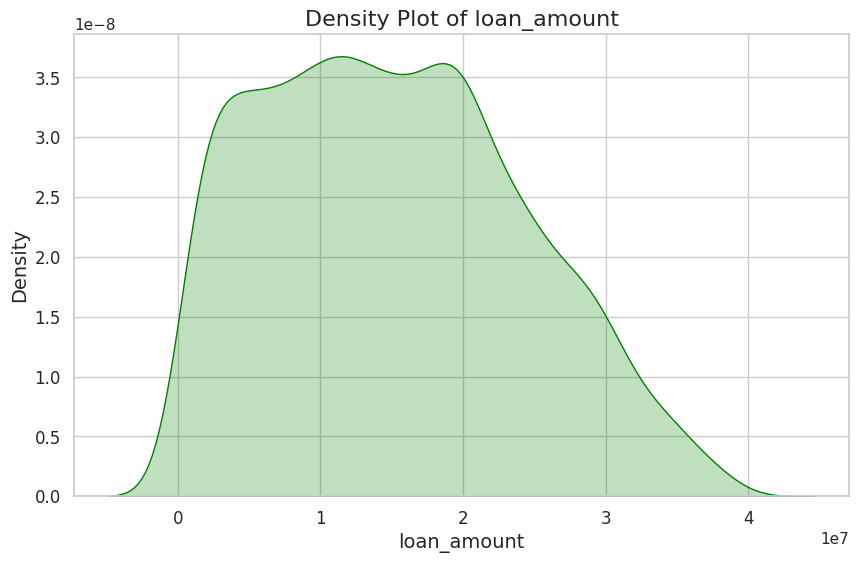

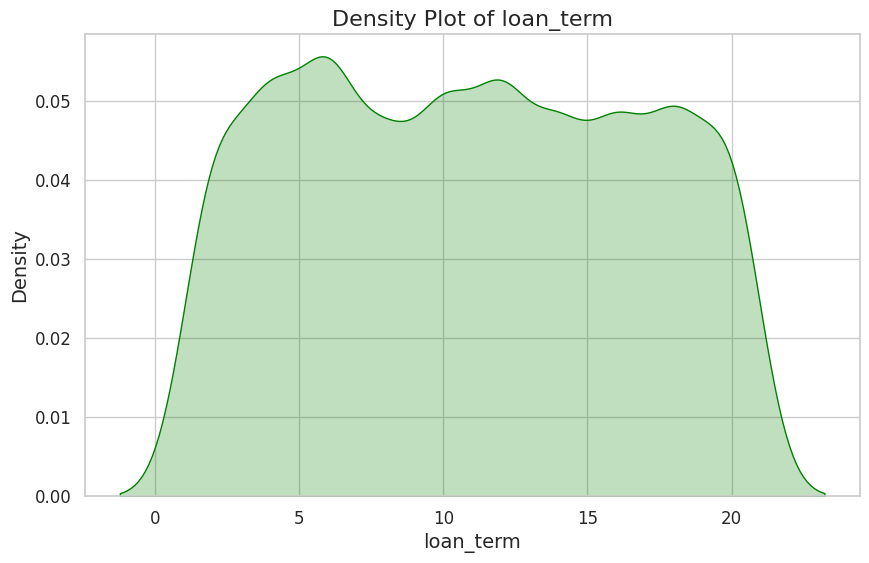

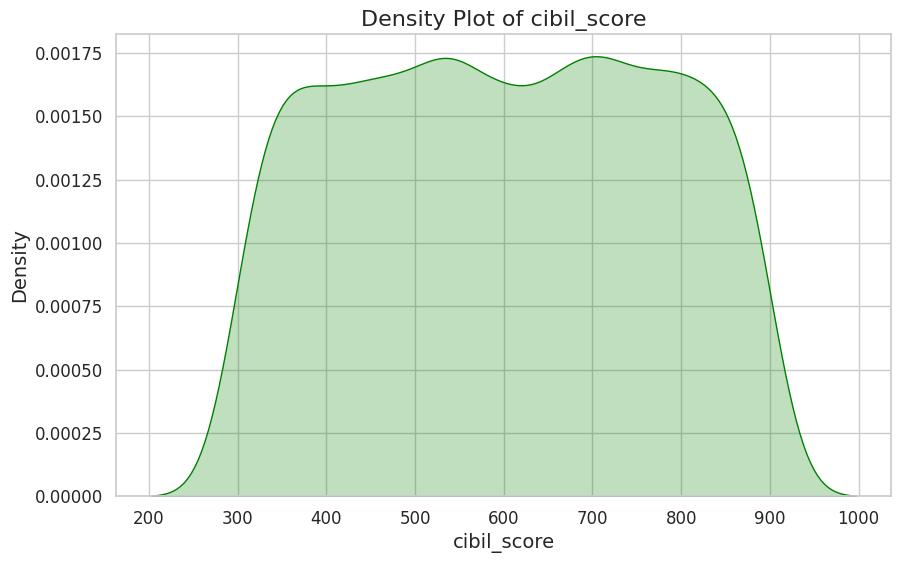

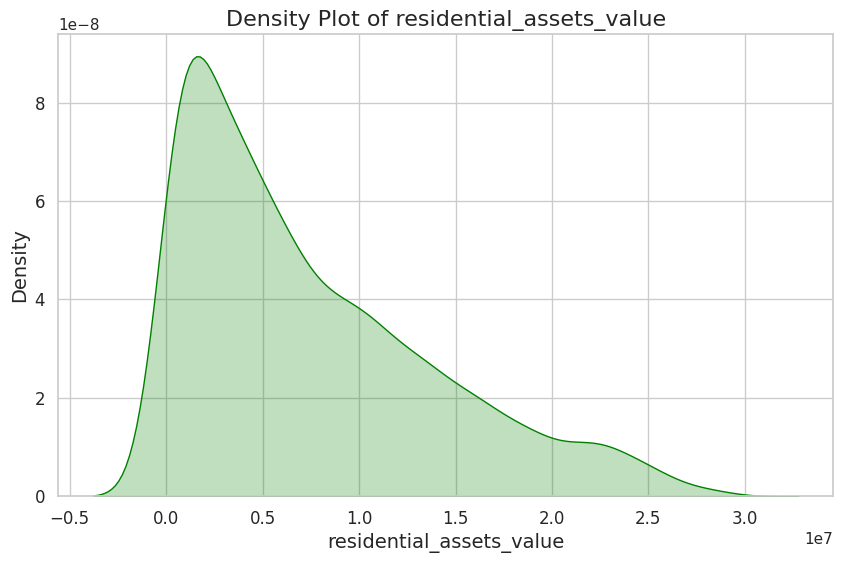

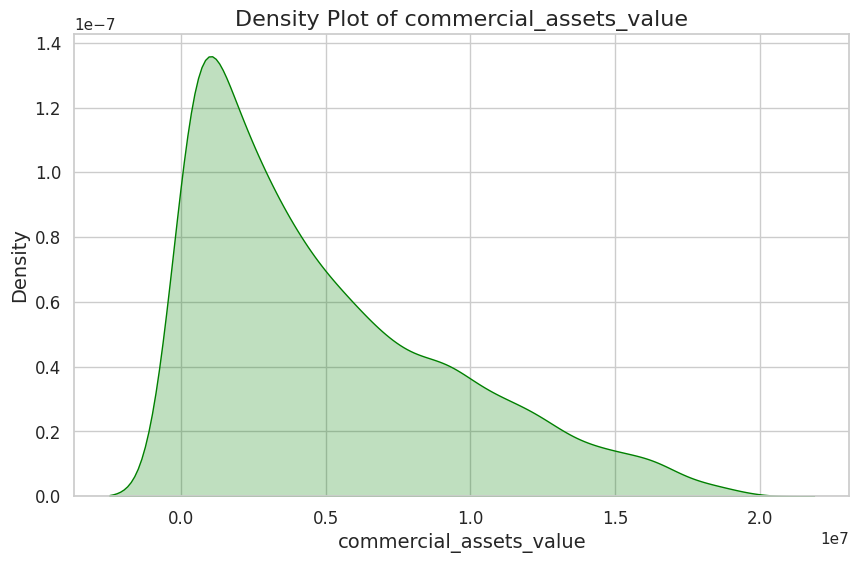

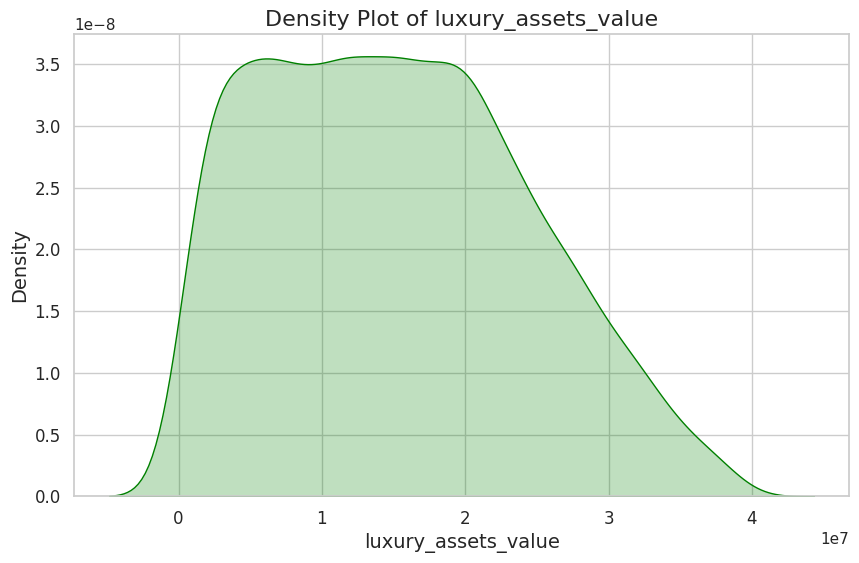

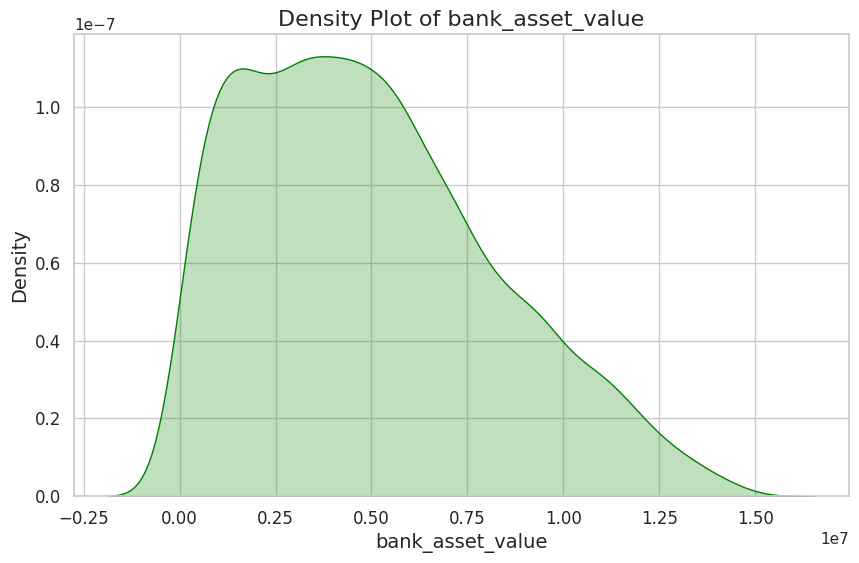

In [12]:
# setting the aesthetic style of the plots
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(style="whitegrid")

# creating the density plots for each numerical column
for column in num_var_loan.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=num_var_loan, x=column, fill=True, color='green')
    
    # Add titles and labels
    plt.title(f'Density Plot of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.show()

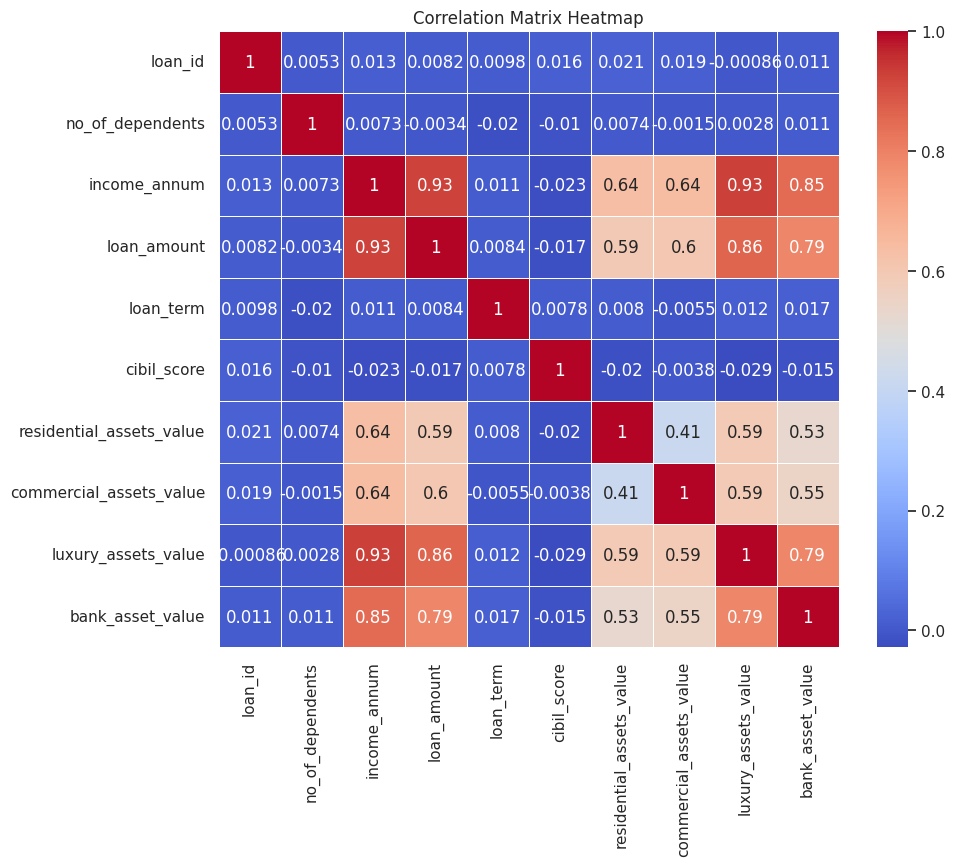

In [13]:
# checking the correlation between the variables of the dataset by creating the heatmap...........................
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# calculate the correlation matrix using the numerical variables of the dataset................
correlation_matrix = num_var_loan.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


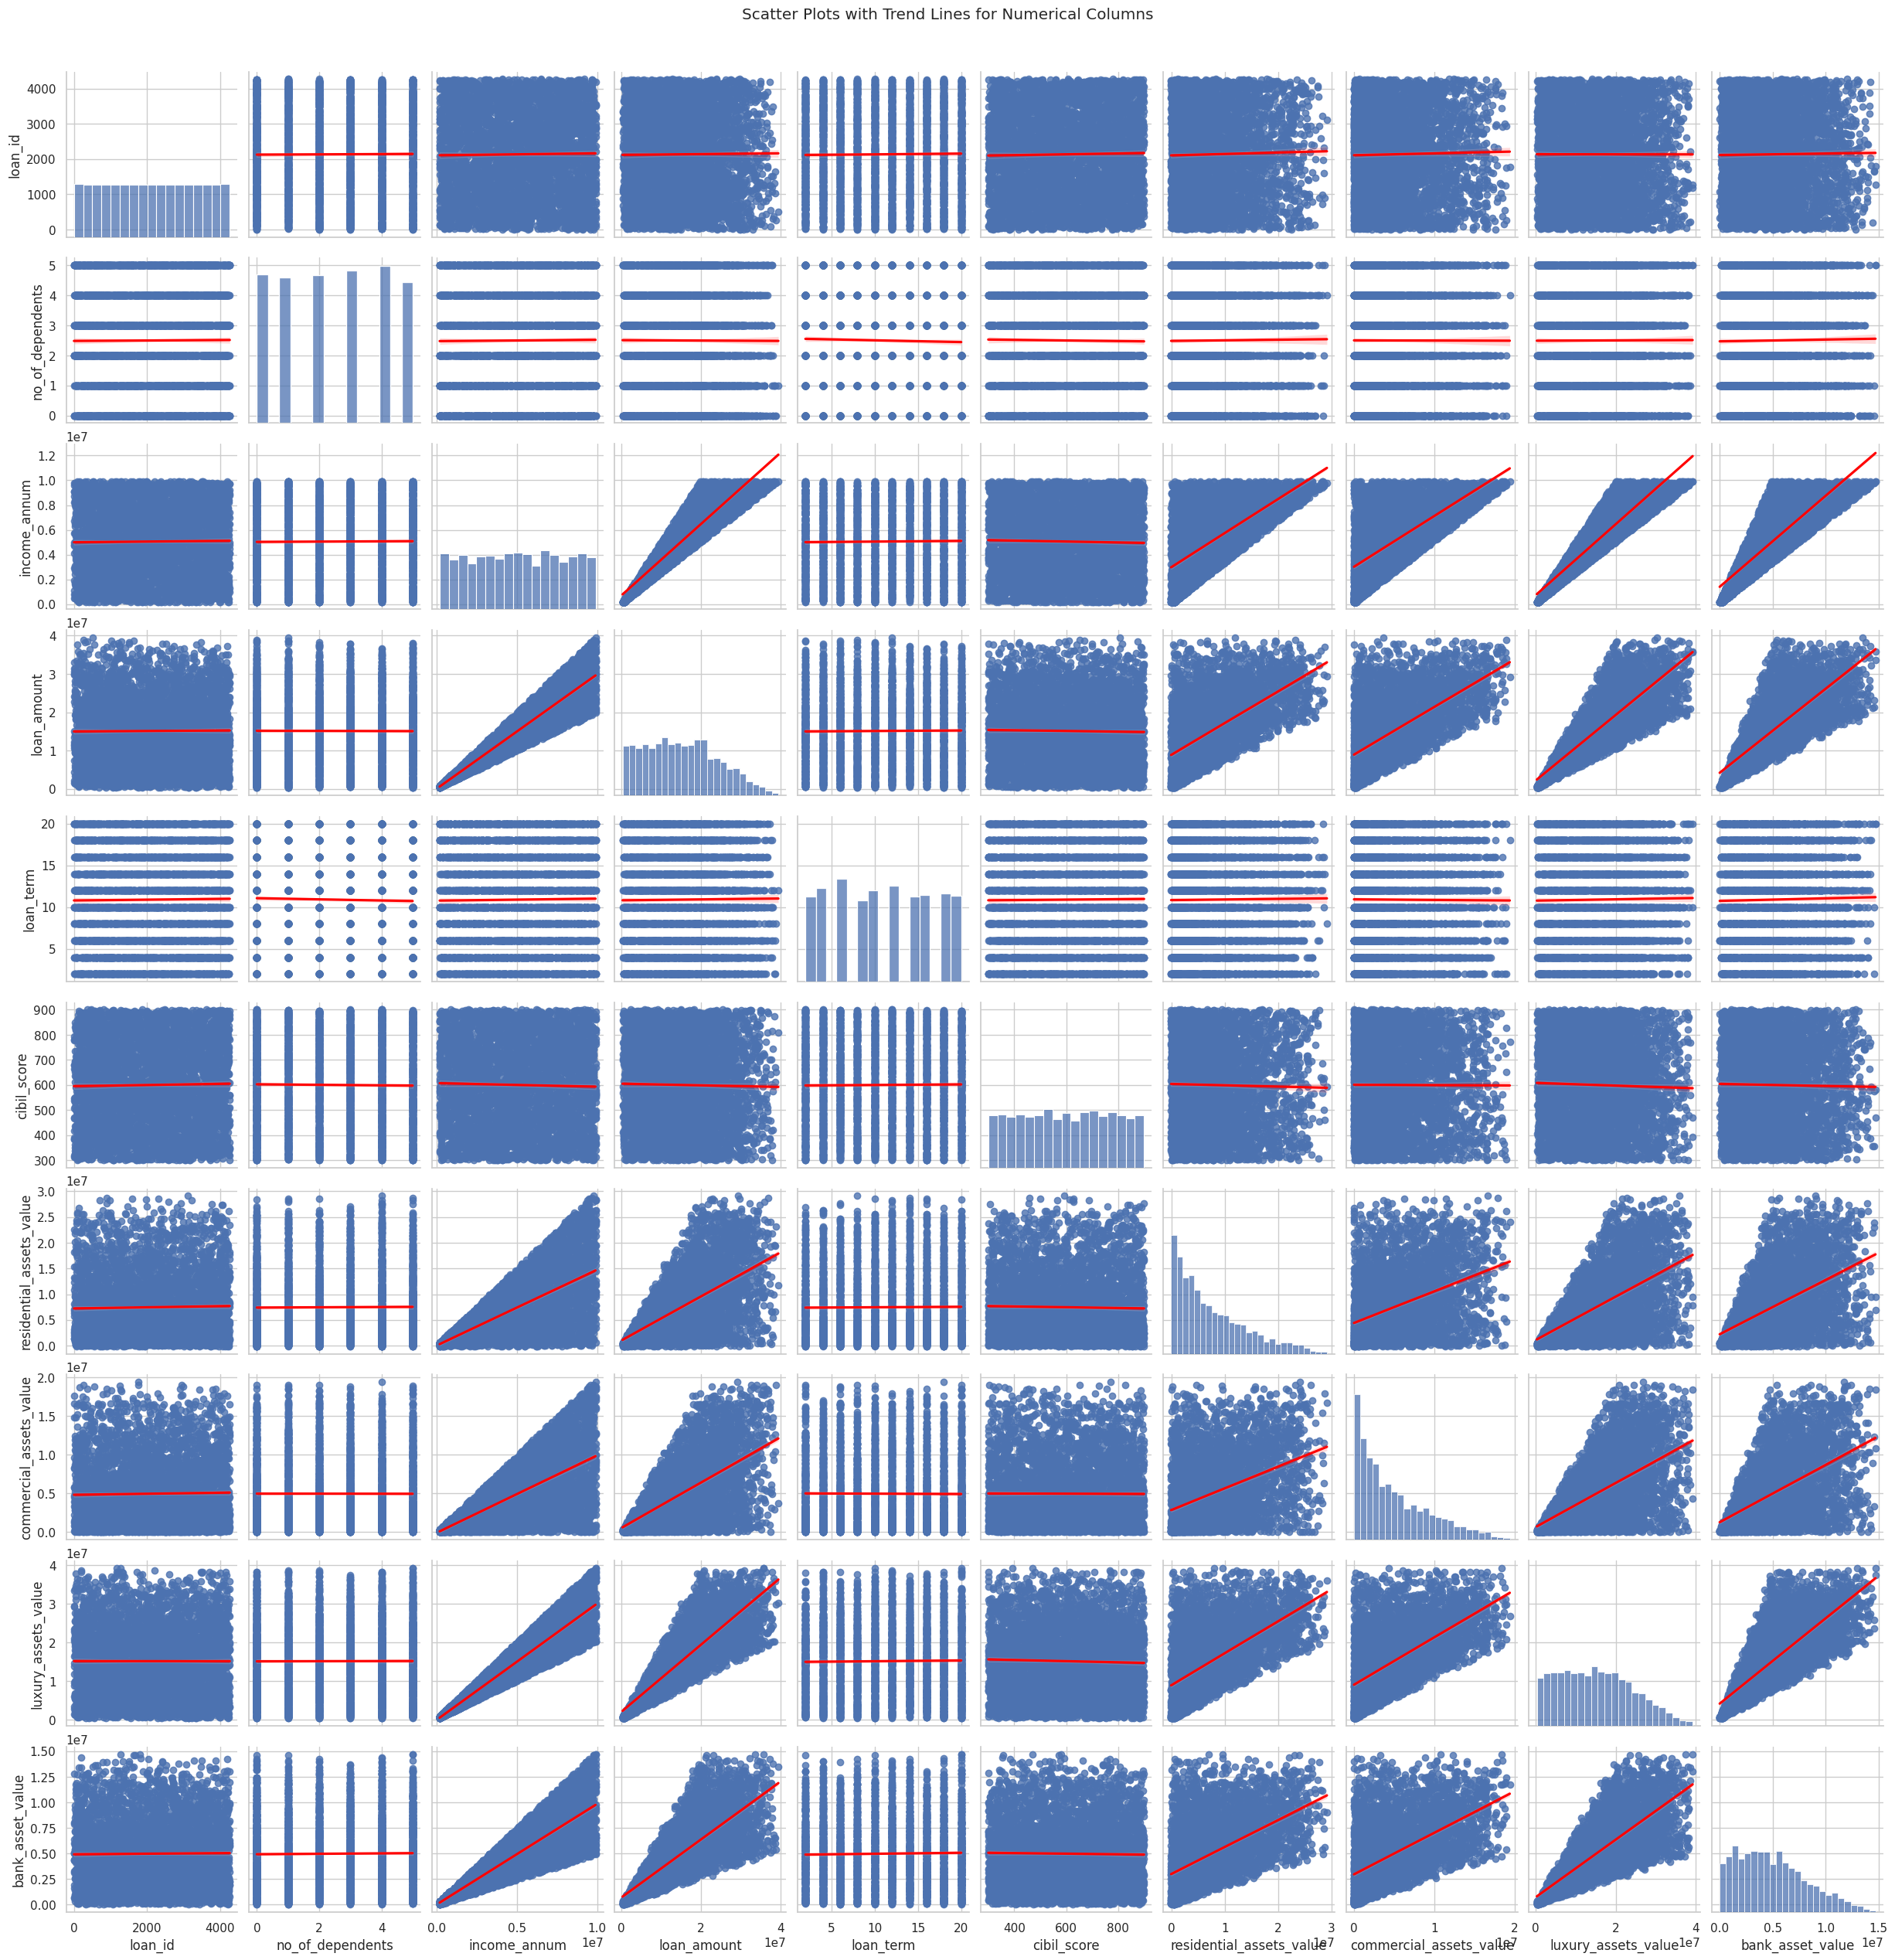

In [14]:
# drawing the scatter plot showing the reflecting the correlation between the variables of the dataset...............................
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# creating a pairplot with trend lines.................
sns.pairplot(num_var_loan, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Scatter Plots with Trend Lines for Numerical Columns', y=1.02)
plt.show()


# Correlation Analysis:
* The correlation either in the heatmap or scatter plots reveals several strong, moderate or weak correlations between key financial variables.
* Annual income (income_annum) and loan amount (loan_amount) are strongly correlated with various asset values, including luxury, residential, commercial, and bank assets.
* This indicates that higher incomes and larger loan amounts are typically associated with higher asset values.
* The number of dependents and loan term, however, show very weak correlations with other variables, suggesting they are relatively independent of the financial metrics considered in the dataset.
* Understanding these relationships is crucial for building accurate predictive models for loan approval, as it helps in identifying which variables are most influential and should be prioritized in the modeling process.

In [15]:
# checking the outliers in the dataset by using the interquartile range (IQR) method...........

#calculate the Q1, Q3 and IQR for each numerical column.....................
stats = num_var_loan.describe(percentiles = [0.25, 0.75])
Q1 = stats.loc['25%']
Q3 = stats.loc['75%']
IQR = Q3 - Q1

#check for outliers
outliers = (num_var_loan < (Q1 - 1.5 * IQR)) | (num_var_loan > (Q3 + 1.5 * IQR))

#display the outliers for each numerical column
print("Outliers for each numerical column: ")
print(outliers.sum())


Outliers for each numerical column: 
loan_id                      0
no_of_dependents             0
income_annum                 0
loan_amount                  0
loan_term                    0
cibil_score                  0
residential_assets_value    52
commercial_assets_value     37
luxury_assets_value          0
bank_asset_value             5
dtype: int64


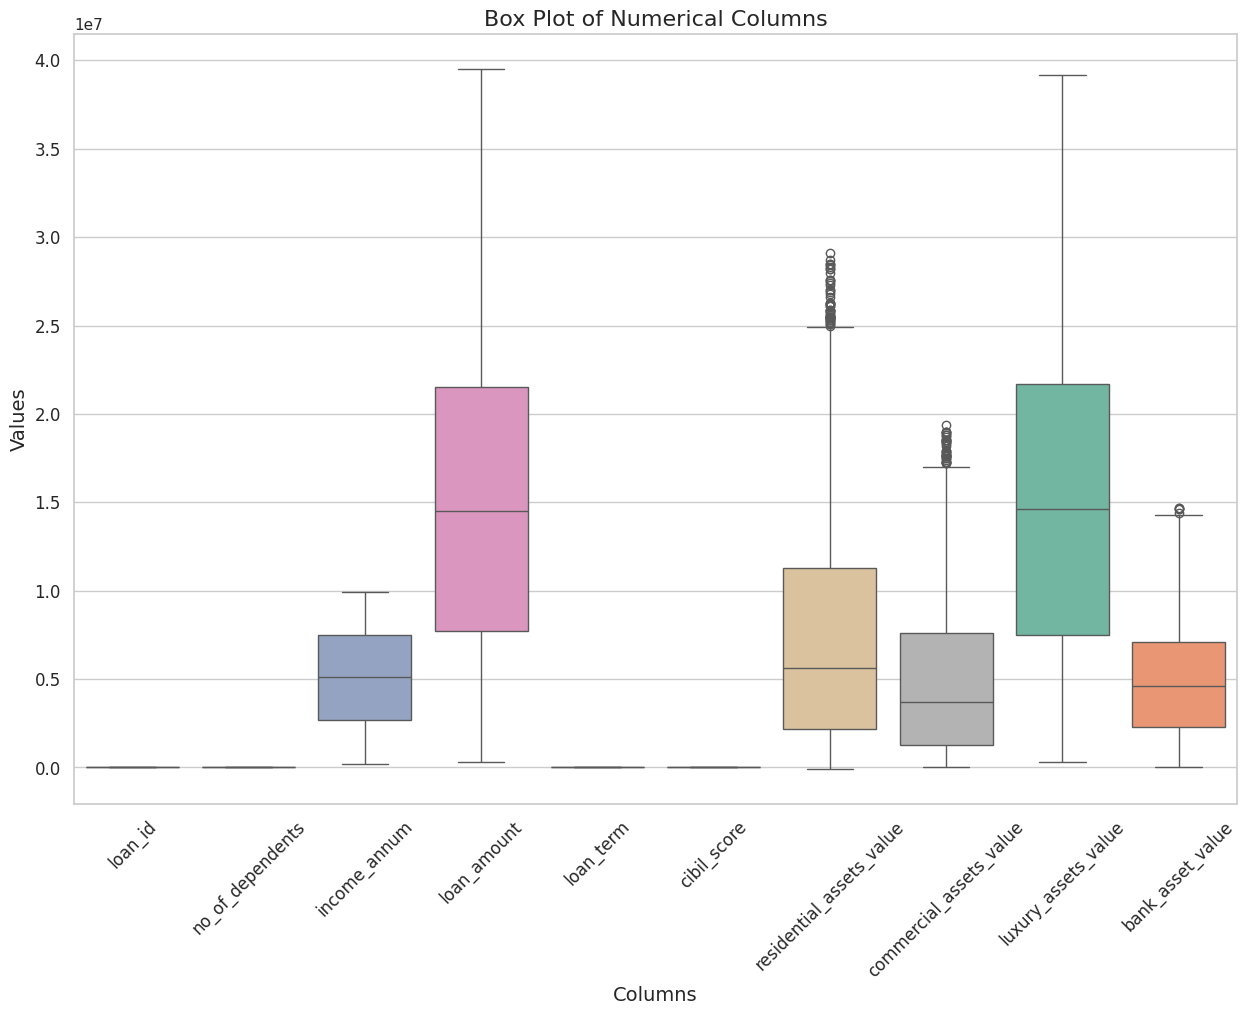

In [16]:
# creating the boxplot to clearly visualize the distribution and identify outliers.................
import seaborn as sns
sns.set(style="whitegrid")
# Create a figure for the overall box plot
plt.figure(figsize=(15, 10))
sns.boxplot(data=num_var_loan, palette="Set2")
plt.title('Box Plot of Numerical Columns', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Outliers Analysis:
* The outlier analysis reveals that most of the numerical columns in the loan approval dataset do not contain outliers, indicating consistent and reasonable data distributions.
* However, the residential_assets_value, commercial_assets_value, and bank_asset_value columns exhibit a notable number of outliers (52, 37, and 5, respectively).
* These outliers may represent genuine extreme values or data entry errors and warrant further investigation.
* Addressing these outliers is crucial for ensuring the accuracy and reliability of any subsequent analysis or predictive modeling.
* Techniques such as winsorization, transformation, or even removal of outliers could be considered to mitigate their impact on the analysis.

In [17]:
num_var_loan.columns

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

In [18]:
# addressing the outliers with median values......................
import numpy as np

# handle outliers using cap method.....................
loan_approval_data[num_var_loan.columns] = np.where(outliers, np.nan, loan_approval_data[num_var_loan.columns])

# assign capped outliers with median values........................
for col in num_var_loan.columns:
        median = loan_approval_data[col].median()
        loan_approval_data[col] = loan_approval_data[col].fillna(median)
        
# ensure outliers were handled...................
outliers_handled = ((loan_approval_data[num_var_loan.columns] < (Q1 - 1.5 * IQR)) | (loan_approval_data[num_var_loan.columns] > (Q3 + 1.5 * IQR))).sum()
print("Remaining outliers: ")
print(outliers_handled)

Remaining outliers: 
loan_id                     0
no_of_dependents            0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
dtype: int64


# Analysis - Why Addressing Outliers with Median value:
* All three variables with the outliers were found with the "right skewed distribution", using the median value to address outliers is considered one of the best approaches.
* The median represents the middle value of a dataset and remains unaffected by unusually high or low values. This makes the median a reliable measure of central tendency, especially in datasets with significant variability or non-normal distributions.
* Replacing the outliers with the median ensures that the overall structure and distribution of the data are preserved. This approach maintains the integrity of the dataset, preventing the distortion of statistical analyses and model predictions.
* By capping outliers to the median, we effectively mitigate their impact without discarding valuable information, leading to more accurate and stable results
* Additionally, using the median to address outliers simplifies the preprocessing steps and enhances the interpretability of the data.
* It ensures that the transformed values remain within a realistic and meaningful range, providing a practical solution for handling extreme values in various analytical and machine learning tasks. Overall, the median's ability to provide a robust central value makes it an excellent choice for addressing outliers in data preprocessing.

In [19]:
loan_approval_data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1.0,2.0,Graduate,No,9600000.0,29900000.0,12.0,778.0,2400000.0,3700000.0,22700000.0,8000000.0,Approved
1,2.0,0.0,Not Graduate,Yes,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,Rejected
2,3.0,3.0,Graduate,No,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,Rejected
3,4.0,3.0,Graduate,No,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,Rejected
4,5.0,5.0,Not Graduate,Yes,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265.0,5.0,Graduate,Yes,1000000.0,2300000.0,12.0,317.0,2800000.0,500000.0,3300000.0,800000.0,Rejected
4265,4266.0,0.0,Not Graduate,Yes,3300000.0,11300000.0,20.0,559.0,4200000.0,2900000.0,11000000.0,1900000.0,Approved
4266,4267.0,2.0,Not Graduate,No,6500000.0,23900000.0,18.0,457.0,1200000.0,12400000.0,18100000.0,7300000.0,Rejected
4267,4268.0,1.0,Not Graduate,No,4100000.0,12800000.0,8.0,780.0,8200000.0,700000.0,14100000.0,5800000.0,Approved


In [20]:
# just duplicting the dataframe for further processing......................
loan_df = loan_approval_data
loan_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1.0,2.0,Graduate,No,9600000.0,29900000.0,12.0,778.0,2400000.0,3700000.0,22700000.0,8000000.0,Approved
1,2.0,0.0,Not Graduate,Yes,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,Rejected
2,3.0,3.0,Graduate,No,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,Rejected
3,4.0,3.0,Graduate,No,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,Rejected
4,5.0,5.0,Not Graduate,Yes,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,Rejected


In [21]:
# Remove 'loan_id' from the features before training the model
loan_df = loan_df.drop(columns=['loan_id'])

In [22]:
# Remove leading/trailing spaces from all column names
loan_df.columns = loan_df.columns.str.strip()

# Remove leading/trailing spaces from all string values in the dataframe
loan_df = loan_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/tmp/ipykernel_2372/1811987920.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  loan_df = loan_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [23]:
loan_df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2.0,Graduate,No,9600000.0,29900000.0,12.0,778.0,2400000.0,3700000.0,22700000.0,8000000.0,Approved
1,0.0,Not Graduate,Yes,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,Rejected
2,3.0,Graduate,No,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,Rejected
3,3.0,Graduate,No,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,Rejected
4,5.0,Not Graduate,Yes,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,Rejected


In [24]:
# Loading necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings
import joblib

### Categorical Encoding

In [25]:
# Preprocess the data
cat_loan_df = loan_df.select_dtypes(include=['object'])

# Encode categorical variables
cat_loan_df = loan_df.select_dtypes(include=['object'])
cat_loan_df = cat_loan_df.drop(columns=['loan_status'])

# Check the result
cat_loan_df.head()

,education,self_employed
0,Graduate,No
1,Not Graduate,Yes
2,Graduate,No
3,Graduate,No
4,Not Graduate,Yes


In [26]:
# Dictionary to store encoders for each column
label_encoders = {}

# Apply Label Encoding to each column in cat_loan_df
for column in cat_loan_df.columns:
    le = LabelEncoder()
    # Fit and transform each column and update the DataFrame with encoded values
    cat_loan_df[column] = le.fit_transform(cat_loan_df[column])  
    label_encoders[column] = le  # Save the encoder for later use

# Check the modified cat_loan_df
print(cat_loan_df.head())

# Save the LabelEncoders dictionary to a joblib file
joblib.dump(label_encoders, 'label_encoders.pkl')

   education  self_employed
0          0              0
1          1              1
2          0              0
3          0              0
4          1              1


['label_encoders.pkl']

In [27]:
# Check the contents of the loaded object
print(label_encoders)  # This will show the dictionary or object saved in the file
# Check the mapping of column encoder
print(label_encoders['education'].classes_)
print(label_encoders['self_employed'].classes_)

{'education': LabelEncoder(), 'self_employed': LabelEncoder()}
['Graduate' 'Not Graduate']
['No' 'Yes']


### Standard scaler for numerical values

In [28]:
num_loan_df = loan_df.select_dtypes(include=['int64','float64'])
num_loan_df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2.0,9600000.0,29900000.0,12.0,778.0,2400000.0,3700000.0,22700000.0,8000000.0
1,0.0,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0
2,3.0,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0
3,3.0,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0
4,5.0,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0


In [29]:
# Standardize the numerical features
scaler = StandardScaler()
scaled_values = scaler.fit_transform(num_loan_df)

# Replace the original num_loan_df with the scaled values, keeping the same column names
scaled_df = pd.DataFrame(scaled_values, columns=num_loan_df.columns)

# Check the scaled num_loan_df
scaled_df.head()

# Save the StandardScaler to a joblib file
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [30]:
# Combining encoded categorical and numerical values in a new df

new_loan_df = pd.concat([cat_loan_df, scaled_df], axis=1)
new_loan_df.head()

,education,self_employed,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,0,0,-0.294102,1.617979,1.633052,0.192617,1.032792,-0.782745,-0.272497,0.832028,0.938773
1,1,1,-1.473548,-0.341750,-0.324414,-0.508091,-1.061051,-0.734006,-0.628366,-0.694993,-0.514945
2,0,0,0.295621,1.439822,1.610933,1.594031,-0.544840,-0.019162,-0.082700,1.996520,2.423420
3,0,0,0.295621,1.119139,1.721525,-0.508091,-0.771045,1.784195,-0.367395,0.897943,0.907842
4,1,1,1.475067,1.689242,1.002681,1.594031,-1.264055,0.841900,0.795110,1.568075,0.010868


### Encoding target column loan_status

In [31]:
# Check the encoded 'loan_status' column
print(loan_df['loan_status'])

0       Approved
1       Rejected
2       Rejected
3       Rejected
4       Rejected
          ...   
4264    Rejected
4265    Approved
4266    Rejected
4267    Approved
4268    Approved
Name: loan_status, Length: 4269, dtype: object


In [32]:
# Apply Label Encoding to 'loan_status' (since it's the target variable)
le_new = LabelEncoder()
loan_df['loan_status'] = le_new.fit_transform(loan_df['loan_status'])

# Save the encoder for future use during prediction
joblib.dump(le_new, 'loan_status_encoder.pkl')

# Check the encoded 'loan_status' column
loan_df['loan_status'].head()

0    0
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

### Finding best 'k' value

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

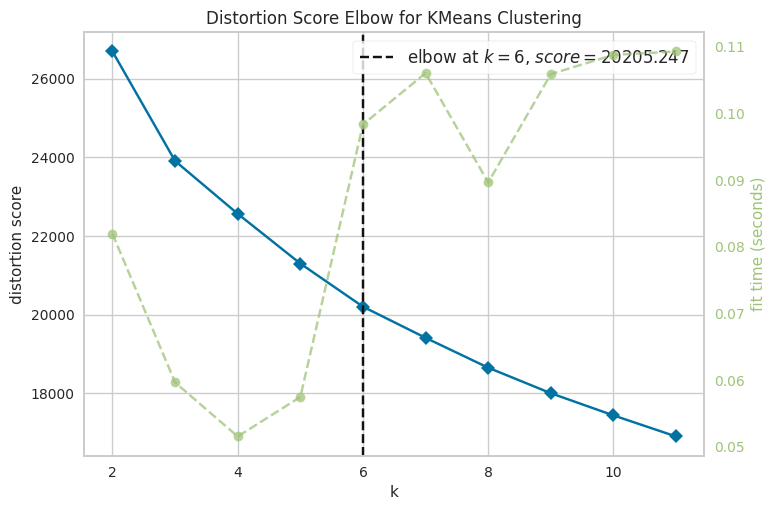

Optimal k: 6


In [33]:
# finding the best "k" value.....................
# Suppress the warnings
warnings.filterwarnings("ignore", category=UserWarning, module="yellowbrick")

# Set n_init explicitly to suppress the warning
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(2, 12))
visualizer.fit(new_loan_df)
visualizer.show()

# Print the optimal k
optimal_k = visualizer.elbow_value_
print(f'Optimal k: {optimal_k}')

### Training & Testing 

In [34]:
# spliting the dataset "loan_df" between the input variables and target variable.............
y = loan_df['loan_status'] # target
X = new_loan_df #features

In [35]:
# apply SelectKBest to select the features.................
k = 6
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

joblib.dump(selector, 'selector.pkl')

['selector.pkl']

In [36]:
# trying 3 different models with the dataset.......................

# splitting the data into training and testing sets.................
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)

lg_model = ''
dt_model = ''
sv_model = ''

# initializing the models......................
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC()
}

# train and evaluate the models.......................
performance = []

for model_name, model in models.items():
    # cross-validation..............
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # train the model.........
    model.fit(X_train, y_train)
    
    # predicting on the test set.................
    y_pred = model.predict(X_test)

    if model_name == 'Logistic Regression':
        lg_model = model
    elif model_name == 'Decision Tree':
        dt_model = model
    else:
        sv_model = model
    
    # calculating the performance metrics...............
    accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    performance.append({
        'Model': model_name,
        'Cross-Validation Accuracy': np.mean(cv_scores),
        'Test Accuracy': accuracy,
        'Mean Squared Error': mse,
        'R^2 Score': r2
    })

# Create a performance table
performance_df = pd.DataFrame(performance)

# Print the performance table
pd.DataFrame(performance_df)


,Model,Cross-Validation Accuracy,Test Accuracy,Mean Squared Error,R^2 Score
0,Logistic Regression,0.918778,0.911049,0.088951,0.616292
1,Decision Tree,0.963454,0.970974,0.029026,0.874790
2,Support Vector Machine,0.944083,0.943820,0.056180,0.757658


In [37]:
# Save the best model (Decision Tree in this case)
best_model = performance_df.loc[performance_df['Test Accuracy'].idxmax()]['Model']
print(f"Best model: {best_model}")

joblib.dump(models[best_model], 'best_model.pkl')

Best model: Decision Tree


['best_model.pkl']

# Model Performance Analysis:
* The performance analysis of the three data models—Logistic Regression, Decision Tree, and Support Vector Machine (SVM)—for classifying mortgage loan approval outcomes reveals noteworthy differences in their effectiveness.
* The Decision Tree model outperforms the other models across most metrics, achieving a cross-validation accuracy of 0.962204 and a test accuracy of 0.970974, indicating excellent generalization to unseen data. It also has the lowest mean squared error (MSE) of 0.029026 and the highest R² score of 0.874790, signifying its superior prediction accuracy and ability to explain a large portion of the variance in loan approval outcomes.
* The Support Vector Machine model also performs strongly, with a cross-validation accuracy of 0.944083 and a test accuracy of 0.943820. Its MSE is 0.056180, and its R² score is 0.757658, reflecting reliable predictions and a substantial ability to explain the variance in the target variable. However, it falls short of the Decision Tree model in both accuracy and variance explanation.
* The Logistic Regression model, while effective, lags behind the other two models in performance. It achieves a cross-validation accuracy of 0.918778 and a test accuracy of 0.911049. The MSE for Logistic Regression is 0.088951, and its R² score is 0.616292, indicating that it is a dependable baseline model but less capable of capturing the complexities in the data compared to the Decision Tree and SVM models.

#### Summary
The Decision Tree model stands out as the best performer, delivering the highest accuracy and predictive power. The Support Vector Machine model is a close second, providing reliable predictions with slightly reduced accuracy and variance explanation. Logistic Regression offers a solid baseline but is comparatively less precise. These results highlight the Decision Tree model as the most suitable choice for predicting mortgage loan approval outcomes.

# Predicting the "Loan Status" by using the new data:

In [40]:
# using the new data to predict loan status by using the Decision Tree model..........
# new data for prediction.....................
new_data = pd.DataFrame({
    'no_of_dependents': [2, 2, 1],
    'income_annum': [9600000, 5000000, 7500000],
    'loan_amount': [29900000, 10000000, 15000000],
    'loan_term': [12, 15, 20],
    'cibil_score': [778, 700, 750],
    'residential_assets_value': [2400000, 6000000, 10000000],
    'commercial_assets_value': [17600000, 2000000, 3000000],
    'luxury_assets_value': [22700000, 8000000, 12000000],
    'bank_asset_value': [8000000, 3000000, 5000000],
    'education': ['Graduate', 'Graduate', 'Not Graduate'],
    'self_employed': ['No', 'No', 'Yes']
})

new_data.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Graduate,No
1,2,5000000,10000000,15,700,6000000,2000000,8000000,3000000,Graduate,No
2,1,7500000,15000000,20,750,10000000,3000000,12000000,5000000,Not Graduate,Yes


In [41]:
# Load the saved encoders
label_encoders = joblib.load('label_encoders.pkl')
scaler = joblib.load('scaler.pkl')
selector = joblib.load('selector.pkl')
best_model = joblib.load('best_model.pkl')
best_model = joblib.load('best_model.pkl')

In [42]:
# categorical encoding
cat_new_data = new_data.select_dtypes(include=['object'])

# Apply transformations using the saved encoders
for column in cat_new_data.columns:
    if column in label_encoders:  # Check if we have an encoder for this column
        cat_new_data[column] = label_encoders[column].transform(cat_new_data[column])

# Check the transformed new data
print(cat_new_data.head())

   education  self_employed
0          0              0
1          0              0
2          1              1


In [43]:
# Fit the scaler on the training data and transform the new data

scale_new_data = new_data.select_dtypes(include=int)
print(scale_new_data)

new_data_scaled = scaler.transform(scale_new_data)
scaled_new_data = pd.DataFrame(new_data_scaled, columns=scale_new_data.columns)
scaled_new_data.head()

   no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0                 2       9600000     29900000         12          778   
1                 2       5000000     10000000         15          700   
2                 1       7500000     15000000         20          750   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                   2400000                 17600000             22700000   
1                   6000000                  2000000              8000000   
2                  10000000                  3000000             12000000   

   bank_asset_value  
0           8000000  
1           3000000  
2           5000000  


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,-0.294102,1.617979,1.633052,0.192617,1.032792,-0.782745,3.025222,0.832028,0.938773
1,-0.294102,-0.021067,-0.567715,0.718147,0.580383,-0.197873,-0.675815,-0.782879,-0.607735
2,-0.883825,0.869719,-0.014758,1.594031,0.870389,0.451986,-0.438569,-0.343449,0.010868


In [44]:
# creating new df 
new_data_df = pd.concat([cat_new_data,scaled_new_data], axis = 1)
new_data_df.head()

,education,self_employed,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,0,0,-0.294102,1.617979,1.633052,0.192617,1.032792,-0.782745,3.025222,0.832028,0.938773
1,0,0,-0.294102,-0.021067,-0.567715,0.718147,0.580383,-0.197873,-0.675815,-0.782879,-0.607735
2,1,1,-0.883825,0.869719,-0.014758,1.594031,0.870389,0.451986,-0.438569,-0.343449,0.010868


In [45]:
# selecting the same top features in new data...........................
new_data_selected = selector.transform(new_data_df)

# predicting the loan status for new data using the Decision Tree model................
new_prediction = best_model.predict(new_data_selected)

status = []
for i in new_prediction:
    if i == 0:
        status.append('Approved')
    else:
        status.append('Rejected')

result = pd.DataFrame({'loan_status': status})
result

,loan_status
0,Approved
1,Approved
2,Approved


### Loan Prediction Analysis Using Decision Tree Model

The Decision Tree model effectively processed the new data and predicted the loan status for all applicants. The combination of encoding, scaling, and feature selection ensured that the new data conformed to the trained model's requirements, enabling accurate predictions. This analysis highlights the model's ability to generalize and make reliable predictions on unseen data.